In [10]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,mean_squared_log_error,explained_variance_score,r2_score

#borough,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,commercial,residencial,mixed,# of bus_stop,# of subway_station,# of FELONY,# of VIOLATION,# of MISDEMEANOR,total # of poi,poi type 1,poi type 2,poi type 3,poi type 4,poi type 5,poi type 6,poi type 7,poi type 8,poi type 9,poi type 10,poi type 11,poi type 12,poi type 13,# of roads,total width of raods

df = pd.read_csv("dataset/feature_matrix_1200m_1column_borough.csv",names=['type','borough','land_area','gross_area','year','price','numBuses','numSubways','numFelonies','numViolations','numMisdemeanors','totalPoi','poi1','poi2','poi3','poi4','poi5','poi6','poi7','poi8','poi9','poi10','poi11','poi12','poi13','numRoads','roadWidth'],skiprows=1,index_col=False) 
df['type'] = pd.Categorical(df['type'],[0,1,2])
df['borough'] = pd.Categorical(df['borough'],[1,2,3,4,5])
train_x, test_x, train_y, test_y = train_test_split(df.loc[:, df.columns != 'price'],df['price'],test_size=.33)

In [9]:
#unique, counts = np.unique(x['borough'], return_counts=True)
#dict(zip(unique, counts))
baseline = np.zeros(df['price'].shape) + np.mean(df['price'])
print("Baseline MAE: {}".format(mean_absolute_error(df['price'],baseline)))
print("Baseline MSE: {}".format(mean_squared_error(df['price'],baseline)))
print("Basline median error: {}".format(median_absolute_error(df['price'],baseline)))
print("Basline mslog error: {}".format(mean_squared_log_error(df['price'],baseline)))
print("Basline variance score: {}".format(explained_variance_score(df['price'],baseline)))
print("Baseline r^2 score: {}".format(r2_score(df['price'],baseline)))

Baseline MAE: 1154577.5431
Baseline MSE: 4.68639521298e+13
Basline median error: 693003.283486
Basline mslog error: 1.08049534903
Basline variance score: 0.0
Baseline r^2 score: 0.0


In [13]:
%%time
forest = RandomForestRegressor(128)
forest.fit(train_x,train_y)
yhat = forest.predict(test_x)
print("MAE: {}".format(mean_absolute_error(test_y,yhat)))
print("MSE: {}".format(mean_squared_error(test_y,yhat)))
print("median error: {}".format(median_absolute_error(test_y,yhat)))
print("mslog error: {}".format(mean_squared_log_error(test_y,yhat)))
print("variance score: {}".format(explained_variance_score(test_y,yhat)))
print("r^2 score: {}".format(r2_score(test_y,yhat)))

MAE: 431104.015089
MSE: 1.0241611163e+13
median error: 93605.0664062
mslog error: 0.18048005181
variance score: 0.332378545469
r^2 score: 0.331972719507
CPU times: user 1min 3s, sys: 312 ms, total: 1min 3s
Wall time: 1min 9s


In [12]:
# Get numerical feature importances
importances = list(forest.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(train_x.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda train_x: train_x[1], reverse = True)
# Print out the feature and importances
#print(feature_importances)
["{}: {}".format(*pair) for pair in feature_importances]

['gross_area: 0.67',
 'numFelonies: 0.06',
 'borough: 0.04',
 'land_area: 0.02',
 'numViolations: 0.02',
 'numMisdemeanors: 0.02',
 'totalPoi: 0.02',
 'poi12: 0.02',
 'year: 0.01',
 'numBuses: 0.01',
 'numSubways: 0.01',
 'poi1: 0.01',
 'poi2: 0.01',
 'poi3: 0.01',
 'poi4: 0.01',
 'poi5: 0.01',
 'poi6: 0.01',
 'poi7: 0.01',
 'poi9: 0.01',
 'numRoads: 0.01',
 'roadWidth: 0.01',
 'type: 0.0',
 'poi8: 0.0',
 'poi10: 0.0',
 'poi11: 0.0',
 'poi13: 0.0']

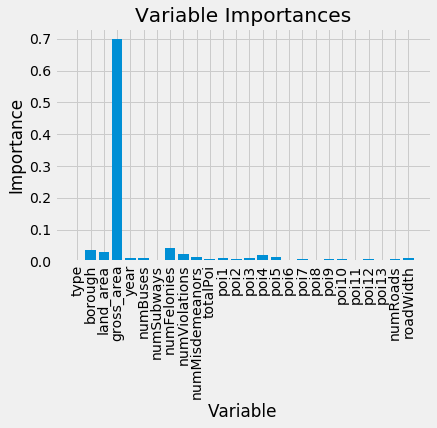

In [5]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list(train_x.columns), rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [6]:
%%time
## Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
#tree = forest.estimators_[5]
# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = list(train_x.columns), rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file //DO NOT DO THIS HOLY CRAP
#graph.write_png('tree.png')
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_x, train_y)
# Extract the small tree
tree_small = rf_small.estimators_[5]

CPU times: user 750 ms, sys: 93.8 ms, total: 844 ms
Wall time: 1.02 s


In [7]:
%%time
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = list(train_x.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

CPU times: user 609 ms, sys: 312 ms, total: 922 ms
Wall time: 2.79 s
